In [ ]:
# pip install pandas numpy matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Frekvenstabeller

In [6]:

# Data (Salary in 1,000 DKK)
freq = {
    37: 4,
    38: 1,
    39: 3,
    40: 5,
    41: 8,
    42: 10,
    43: 0,
    45: 0,
    46: 2,
    47: 3,
    48: 0,
    49: 0,
    50: 1,
}

salaries = sorted(freq.keys())
frequencies = [freq[s] for s in salaries] # Dette er en liste med frekvenserne for hver løn. Det hedder list comprehension.

df = pd.DataFrame({"Salary (×1000 DKK)": salaries, "Frequency": frequencies})
df


,Salary (×1000 DKK),Frequency
0,37,4
1,38,1
2,39,3
3,40,5
4,41,8
5,42,10
6,43,0
7,45,0
8,46,2
9,47,3


In [7]:
df_style = (
    df.style
      .hide(axis="index")
      .format(precision=0)
      .set_table_attributes('style="border-collapse:collapse; font-family: sans-serif;"')
      .set_properties(**{"border": "1px solid #ddd", "padding": "6px"})
)

df_style

Salary (×1000 DKK),Frequency
37,4
38,1
39,3
40,5
41,8
42,10
43,0
45,0
46,2
47,3


### Grafer

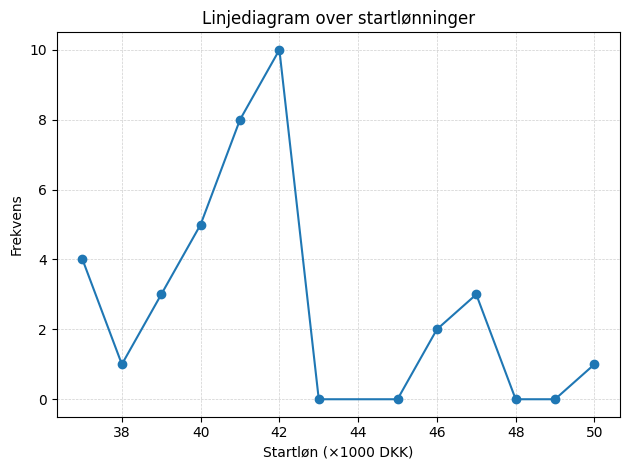

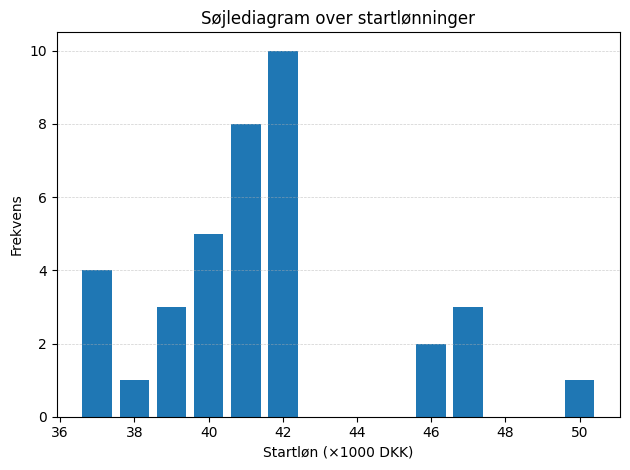

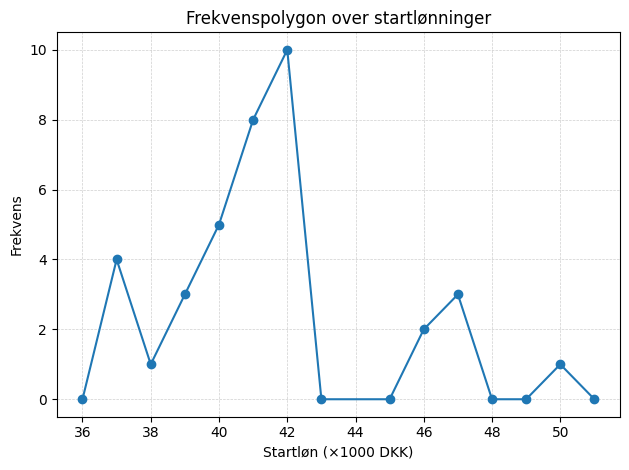

In [9]:
# Linjeplot
plt.figure()
plt.plot(salaries, frequencies, marker="o")
plt.title("Linjediagram over startlønninger")
plt.xlabel("Startløn (×1000 DKK)")
plt.ylabel("Frekvens")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()

# Søjlediagram
plt.figure()
plt.bar(salaries, frequencies)
plt.title("Søjlediagram over startlønninger")
plt.xlabel("Startløn (×1000 DKK)")
plt.ylabel("Frekvens")
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()

# Polygon

# Tilføj endepunkter ved nul for at lukke polygonen
x_poly = [salaries[0] - 1] + salaries + [salaries[-1] + 1]
y_poly = [0] + frequencies + [0]

plt.figure()
plt.plot(x_poly, y_poly, marker="o")
plt.title("Frekvenspolygon over startlønninger")
plt.xlabel("Startløn (×1000 DKK)")
plt.ylabel("Frekvens")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()

### Relative og kumulative frekvenser

In [15]:
# Opret DataFrame
df = pd.DataFrame({
    "Startløn (×1000 DKK)": sorted(freq.keys()),
    "Frekvens": [freq[s] for s in sorted(freq.keys())]
})

# Samlet antal observationer
total = df["Frekvens"].sum()

# Beregn relative og kumulative frekvenser
df["Relativ frekvens"] = df["Frekvens"] / total
df["Kumulativ frekvens"] = df["Frekvens"].cumsum()
df["Kumulativ relativ frekvens"] = df["Kumulativ frekvens"] / total

# Afrund til 2 decimaler for pænhed
df = df.round({
    "Relativ frekvens": 3,
    "Kumulativ relativ frekvens": 3
})

df

,Startløn (×1000 DKK),Frekvens,Relativ frekvens,Kumulativ frekvens,Kumulativ relativ frekvens
0,37,4,0.108,4,0.108
1,38,1,0.027,5,0.135
2,39,3,0.081,8,0.216
3,40,5,0.135,13,0.351
4,41,8,0.216,21,0.568
5,42,10,0.270,31,0.838
6,43,0,0.000,31,0.838
7,45,0,0.000,31,0.838
8,46,2,0.054,33,0.892
9,47,3,0.081,36,0.973


### Histogrammer

In [16]:
# Alle 200 lampers levetider
lifetimes = np.array([
1067, 919, 1196, 785, 1126, 936, 918, 1156, 920, 948,
855, 1092, 1162, 1170, 929, 950, 905, 972, 1035, 1045,
1157, 1195, 1195, 1340, 1122, 938, 970, 1237, 956, 1102,
1022, 978, 832, 1009, 1157, 1151, 1009, 765, 958, 902,
923, 1333, 811, 1217, 1085, 896, 958, 1311, 1037, 702,
521, 933, 928, 1153, 946, 858, 1071, 1069, 830, 1063,
930, 807, 954, 1063, 1002, 909, 1077, 1021, 1062, 1157,
999, 932, 1035, 944, 1049, 940, 1122, 1115, 833, 1320,
901, 1324, 818, 1250, 1203, 1078, 890, 1303, 1011, 1102,
996, 780, 900, 1106, 704, 621, 854, 1178, 1138, 951,
1187, 1067, 1118, 1037, 958, 760, 1101, 949, 992, 966,
824, 653, 980, 935, 878, 934, 910, 1058, 730, 980,
844, 814, 1103, 1000, 788, 1143, 935, 1069, 1170, 1067,
1037, 1151, 863, 990, 1035, 1112, 931, 970, 932, 904,
1026, 1147, 883, 867, 990, 1258, 1192, 922, 1150, 1091,
1039, 1083, 1040, 1289, 699, 1083, 880, 1029, 658, 912,
1023, 984, 856, 924, 801, 1122, 1292, 1116, 880, 1173,
1134, 932, 938, 1078, 1180, 1106, 1184, 954, 824, 529,
998, 996, 1133, 765, 775, 1105, 1081, 1171, 705, 1425,
610, 916, 1001, 895, 709, 860, 1110, 1149, 972, 1002
])

len(lifetimes)


200

In [17]:
# Definér intervaller og etiketter
bins = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]
etiketter = ["500–600", "600–700", "700–800", "800–900", "900–1000",
             "1000–1100", "1100–1200", "1200–1300", "1300–1400", "1400–1500"]

# Frekvensoptælling
frekvens, _ = np.histogram(lifetimes, bins=bins)
total = frekvens.sum()

# Byg frekvenstabel
tabel = pd.DataFrame({
    "Klasseinterval": etiketter,
    "Frekvens": frekvens,
    "Relativ frekvens": frekvens / total,
    "Kumulativ relativ frekvens": np.cumsum(frekvens) / total
})

# Afrund for præsentation
tabel = tabel.round(3)

tabel

,Klasseinterval,Frekvens,Relativ frekvens,Kumulativ relativ frekvens
0,500–600,2,0.010,0.010
1,600–700,5,0.025,0.035
2,700–800,12,0.060,0.095
3,800–900,25,0.125,0.220
4,900–1000,58,0.290,0.510
5,1000–1100,41,0.205,0.715
6,1100–1200,43,0.215,0.930
7,1200–1300,7,0.035,0.965
8,1300–1400,6,0.030,0.995
9,1400–1500,1,0.005,1.000


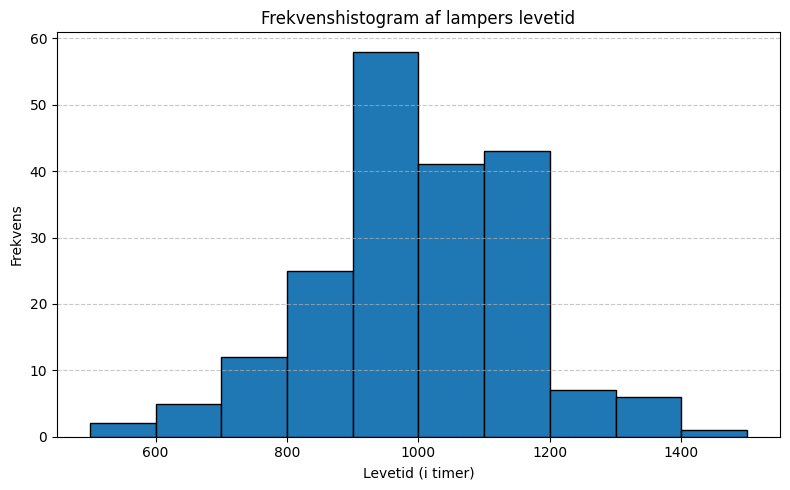

In [19]:
plt.figure(figsize=(8, 5))
plt.hist(lifetimes, bins=bins, edgecolor='black')
plt.title("Frekvenshistogram af lampers levetid")
plt.xlabel("Levetid (i timer)")
plt.ylabel("Frekvens")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


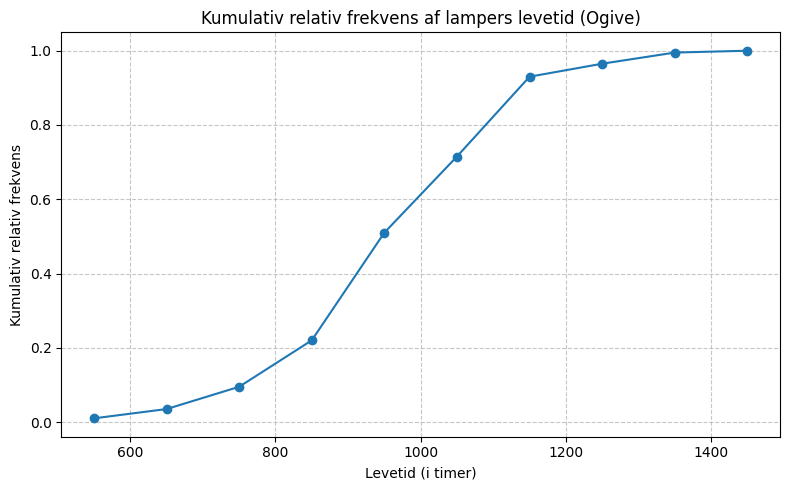

In [23]:
# Midtpunkter til plot
midtpunkter = [550, 650, 750, 850, 950, 1050, 1150, 1250, 1350, 1450]
kum_rel = np.cumsum(frekvens) / total

plt.figure(figsize=(8, 5))
plt.plot(midtpunkter, kum_rel, marker='o')
plt.title("Kumulativ relativ frekvens af lampers levetid (Ogive)")
plt.xlabel("Levetid (i timer)")
plt.ylabel("Kumulativ relativ frekvens")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
